**Gaussaian Naive Bayes on IRIS DATASET**

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix , accuracy_score ,f1_score,  precision_score , recall_score , ConfusionMatrixDisplay , classification_report
import scipy.stats as st
from feature_engine.outliers import Winsorizer

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**EDA**

In [4]:
df.shape

(150, 5)

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

sepal_length       Axes(0.125,0.53;0.352273x0.35)
sepal_width     Axes(0.547727,0.53;0.352273x0.35)
petal_length       Axes(0.125,0.11;0.352273x0.35)
petal_width     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

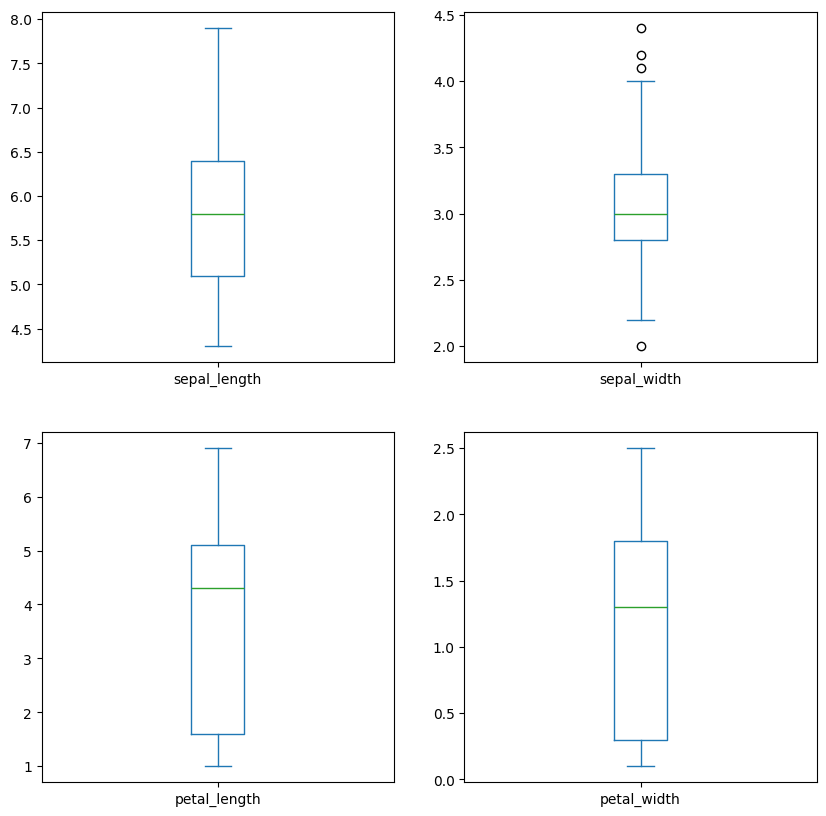

In [11]:
numeric = df.select_dtypes(include='float')
numeric.plot(kind='box' , subplots=True , layout=(2,2) , figsize=(10,10))

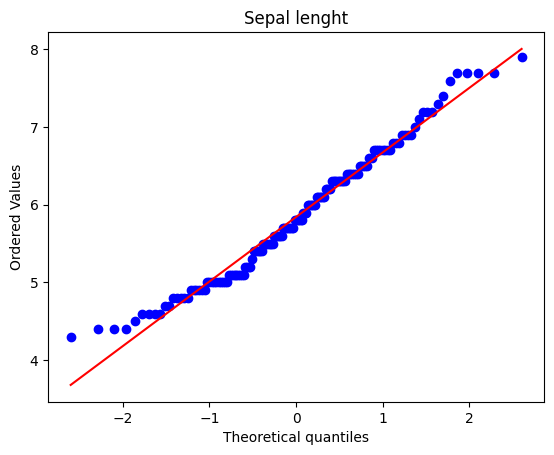

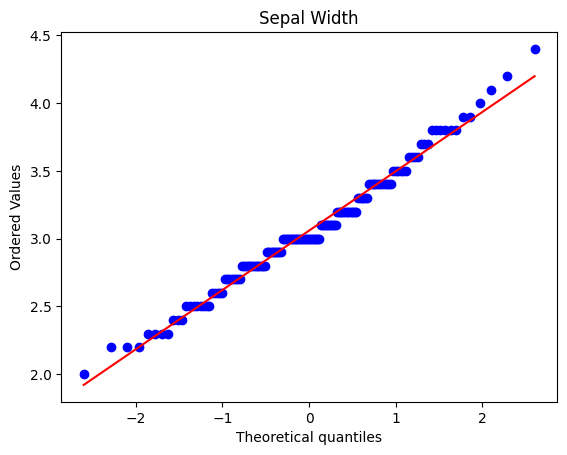

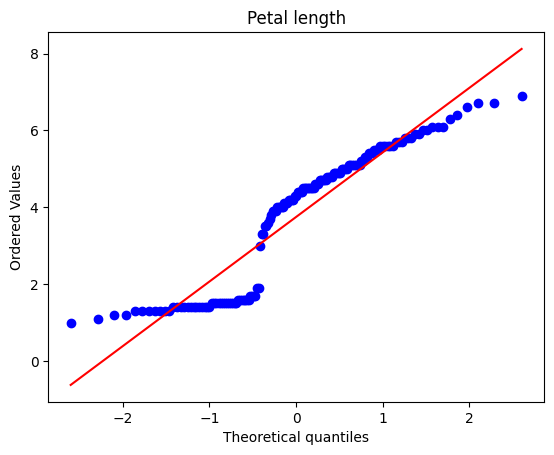

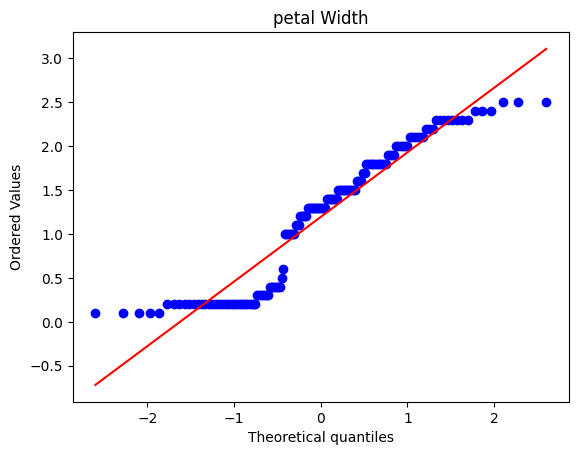

In [12]:
st.probplot(df['sepal_length'] , plot=plt)
plt.title("Sepal lenght")
plt.show()

st.probplot(df['sepal_width'] , plot=plt)
plt.title("Sepal Width")
plt.show()

st.probplot(df['petal_length'] , plot=plt)
plt.title("Petal length")
plt.show()

st.probplot(df['petal_width'] , plot=plt)
plt.title("petal Width")
plt.show()

**Splitting**

In [13]:
X = df.drop('species' , axis = 1)
y = df['species']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=13)

**Data Preprocessing**

In [15]:
wins = Winsorizer(capping_method='mad' , tail='both' , fold=3)
wins.fit(X_train[['sepal_width']])
X_train[['sepal_width']] = wins.transform(X_train[['sepal_width']])

X_test[['sepal_width']] = wins.transform(X_test[['sepal_width']])

<Axes: >

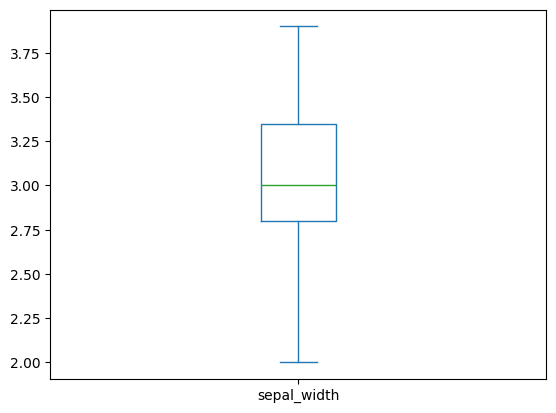

In [16]:
X_train[['sepal_width']].plot(kind='box')

In [17]:
X_train['petal_length'] = np.square(X_train['petal_length'])
X_train['petal_width']  = np.square(X_train['petal_width'])

X_test['petal_length'] = np.square(X_test['petal_length'])
X_test['petal_width']  = np.square(X_test['petal_width'])

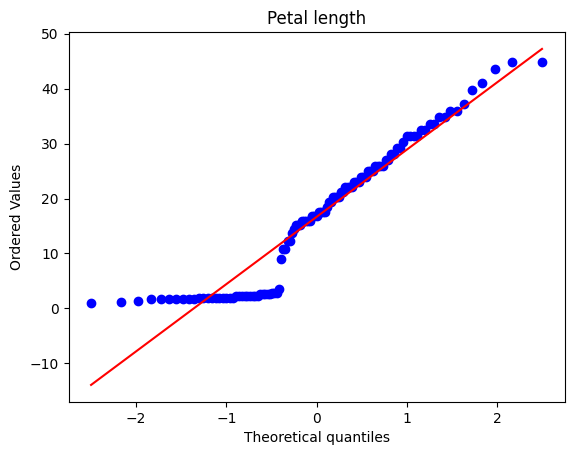

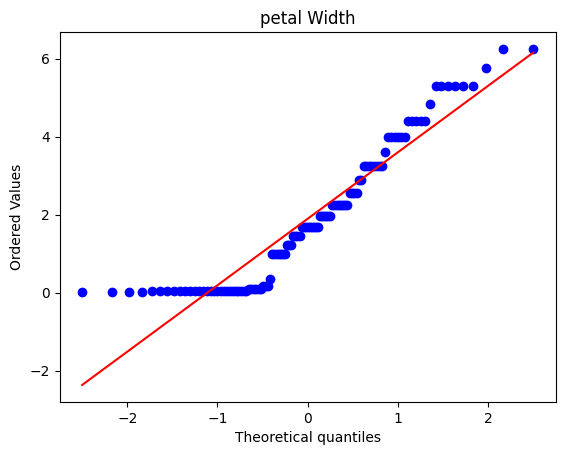

In [20]:
st.probplot(X_train['petal_length'] , plot=plt)
plt.title("Petal length")
plt.show()

st.probplot(X_train['petal_width'] , plot=plt)
plt.title("petal Width")
plt.show()

**Model Building**

In [24]:
gnb = GaussianNB()
gnb.fit(X_train , y_train)
y_pred = gnb.predict(X_test)
y_pred

array(['versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'setosa', 'versicolor'], dtype='<U10')

**Model Evaluation**

In [25]:
confusion_matrix(y_test , y_pred)

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 15]], dtype=int64)

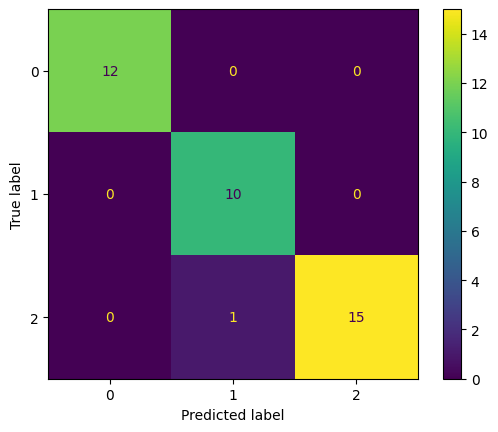

In [34]:
ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred)).plot()

In [35]:
accuracy_score(y_test , y_pred)

0.9736842105263158

In [37]:
precision_score(y_test , y_pred, average='weighted')

0.9760765550239235

In [38]:
recall_score(y_test , y_pred, average='weighted')

0.9736842105263158

In [40]:
f1_score(y_test , y_pred, average='weighted')

0.9738863287250384

In [44]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [46]:
print("Accuracy" , accuracy_score(y_test , y_pred))
print("Precision" , precision_score(y_test , y_pred, average='weighted'))
print("Recall" , recall_score(y_test , y_pred, average='weighted'))
print("F1 " , f1_score(y_test , y_pred, average='weighted'))
print(print(classification_report(y_test , y_pred)))

Accuracy 0.9736842105263158
Precision 0.9760765550239235
Recall 0.9736842105263158
F1  0.9738863287250384
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

None


## Emotion Detection ML Model using multinomial NB

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , precision_score , f1_score , confusion_matrix , ConfusionMatrixDisplay , classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
import re
import autocorrect
from nltk.stem import PorterStemmer
import pandas as pd
import emoji
import re
from nltk.stem import PorterStemmer , WordNetLemmatizer , LancasterStemmer , SnowballStemmer
from nltk.corpus import stopwords
import autocorrect
from nltk.tokenize import word_tokenize , sent_tokenize

In [24]:
df = pd.read_csv(r"C:\Users\User\Downloads\emotions.csv")
df

,text,label
0,ive enjoyed being able to slouch about relax a...,0
1,i dont know i feel so lost,0
2,i was beginning to feel quite disheartened,0
3,i can still lose the weight without feeling de...,0
4,im feeling a little like a damaged tree and th...,0
...,...,...
11995,i feel weird using his first name but the alte...,5
11996,i read them i feel pleasantly surprised that t...,5
11997,i feel a strange sense of guilt about it all,5
11998,i let people know how i m actually feeling and...,5


**EDA**

In [25]:
df.shape

(12000, 2)

In [26]:
df.columns

Index(['text', 'label'], dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12000 non-null  object
 1   label   12000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 187.6+ KB


In [28]:
df.isna().sum()

text     0
label    0
dtype: int64

In [29]:
df.duplicated().sum()

1

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.duplicated().sum()

0

In [32]:
df['label'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [33]:
df['label'] = df['label'].map({0:'Sad' , 1:"Joy" , 2:"Love" , 3:"Anger" , 4:"Fear" , 5:"Surprise"})
df['label']

0             Sad
1             Sad
2             Sad
3             Sad
4             Sad
           ...   
11995    Surprise
11996    Surprise
11997    Surprise
11998    Surprise
11999    Surprise
Name: label, Length: 11999, dtype: object

In [34]:
df

,text,label
0,ive enjoyed being able to slouch about relax a...,Sad
1,i dont know i feel so lost,Sad
2,i was beginning to feel quite disheartened,Sad
3,i can still lose the weight without feeling de...,Sad
4,im feeling a little like a damaged tree and th...,Sad
...,...,...
11995,i feel weird using his first name but the alte...,Surprise
11996,i read them i feel pleasantly surprised that t...,Surprise
11997,i feel a strange sense of guilt about it all,Surprise
11998,i let people know how i m actually feeling and...,Surprise


<Axes: xlabel='label'>

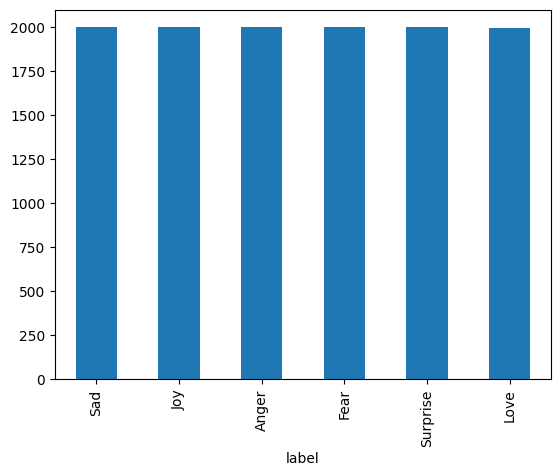

In [35]:
df['label'].value_counts().plot(kind='bar')

**Splitting**

In [36]:
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=13)

**Data preprocessing**

In [39]:
X_train_bow = pd.DataFrame(bow.transform(X_train).todense() , columns=bow.get_feature_names_out())
X_test_bow = pd.DataFrame(bow.transform(X_test).todense() , columns=bow.get_feature_names_out())

In [38]:
bow = CountVectorizer()
bow.fit(X_train)

CountVectorizer()

**Model**

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
mnb = MultinomialNB()
mnb.fit(X_train_bow , y_train)

y_pred = mnb.predict(X_test_bow)

accuracy_score(y_test , y_pred)

0.7979166666666667

In [ ]:
def det(n):
    if n == 1:
        return "Brain Tumor Detected"
    else:
        return "Brain Tumor not Detected"

In [ ]:
df['Class'] = df['Class'].apply(det)